## Concolutional Neural Network

In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [72]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y_train = train.label
x_train = train.drop("label",axis=1)
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
x_train.shape

(42000, 784)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

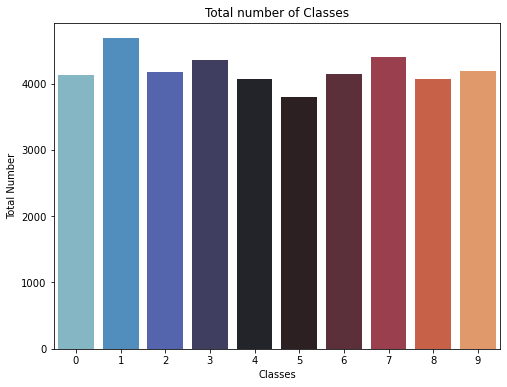

In [76]:
plt.figure(figsize=(8,6))
g = sns.countplot(y_train, palette="icefire")
plt.title("Total number of Classes")
plt.ylabel("Total Number")
plt.xlabel("Classes")
y_train.value_counts()

In [77]:
import random
def plot_random_image(x_train):
    image_num = random.randint(0,x_train.shape[0])
    image = x_train.iloc[image_num].to_numpy()
    image = image.reshape(28,28)
    plt.imshow(image, cmap="gray")
    plt.title("The Class:"+str(y_train.iloc[image_num]))
    plt.show()
    
    return image
    


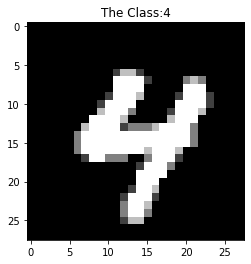

In [78]:
image = plot_random_image(x_train)

In [79]:
np.sqrt(782)

27.964262908219126

<a id="2"></a>
## Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape  **WHY?**
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [80]:
## NORMALIZATION ##
x_train = x_train/255.0
test = test / 255.0
print("x_train shape: ",x_train.shape)
print("test shape: ",test.shape)


x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [81]:
## RESHAPING ##
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",x_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [82]:
import tensorflow as tf


In [83]:
from keras.utils.np_utils import to_categorical

In [84]:
# Label Encoding 
y_train = to_categorical(y_train, num_classes=10)
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [85]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)


x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [112]:
X_train[0][:,:,0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

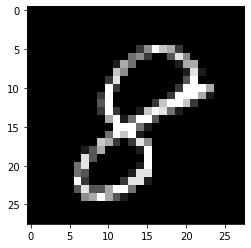

In [118]:
# Some examples
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [119]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [154]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(5,5), padding="Same", activation ="relu"))#, input_shape=(28,28,2)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#model.add(tf.keras.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="Same", activation ="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#model.add(tf.keras.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

model.fit(X_train,Y_train,epochs=10,batch_size=250)


Epoch 1/10
152/152 [==============================] - 3s 21ms/step - loss: 0.5008 - accuracy: 0.8570
Epoch 2/10
152/152 [==============================] - 3s 21ms/step - loss: 0.1146 - accuracy: 0.9658
Epoch 3/10
152/152 [==============================] - 3s 21ms/step - loss: 0.0789 - accuracy: 0.9756
Epoch 4/10
152/152 [==============================] - 3s 22ms/step - loss: 0.0646 - accuracy: 0.9802
Epoch 5/10
152/152 [==============================] - 3s 21ms/step - loss: 0.0532 - accuracy: 0.9837
Epoch 6/10
152/152 [==============================] - 3s 21ms/step - loss: 0.0439 - accuracy: 0.9865
Epoch 7/10
152/152 [==============================] - 3s 21ms/step - loss: 0.0372 - accuracy: 0.9883
Epoch 8/10
152/152 [==============================] - 3s 21ms/step - loss: 0.0332 - accuracy: 0.9900
Epoch 9/10
152/152 [==============================] - 3s 22ms/step - loss: 0.0281 - accuracy: 0.9913
Epoch 10/10
152/152 [==============================] - 3s 21ms/step - loss: 0.0278 - accura

In [155]:
results=pd.DataFrame(model.history.history)
results

,loss,accuracy
0,0.500811,0.856958
1,0.114643,0.965767
2,0.078876,0.975556
3,0.064604,0.980159
4,0.053163,0.983730
5,0.043915,0.986481
6,0.037239,0.988333
7,0.033225,0.989974
8,0.028143,0.991270
9,0.027771,0.991032


In [156]:
model.history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

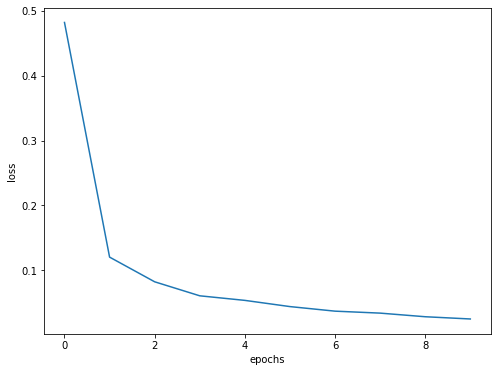

In [162]:
plt.figure(figsize=(8,6))
y_data = model.history.history["loss"]
x_data=model.history.epoch
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(x_data,y_data)

In [158]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(5,5), padding="Same", activation ="relu"))#, input_shape=(28,28,2)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#model.add(tf.keras.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="Same", activation ="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#model.add(tf.keras.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

model.fit(X_train,Y_train,epochs=10,batch_size=250,
          validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)


Epoch 1/10
151/151 [==============================] - 4s 23ms/step - loss: 0.4817 - accuracy: 0.8638 - val_loss: 0.1572 - val_accuracy: 0.9507
Epoch 2/10
151/151 [==============================] - 3s 22ms/step - loss: 0.1206 - accuracy: 0.9635 - val_loss: 0.0970 - val_accuracy: 0.9705
Epoch 3/10
151/151 [==============================] - 3s 22ms/step - loss: 0.0826 - accuracy: 0.9752 - val_loss: 0.0811 - val_accuracy: 0.9748
Epoch 4/10
151/151 [==============================] - 3s 22ms/step - loss: 0.0610 - accuracy: 0.9813 - val_loss: 0.0680 - val_accuracy: 0.9783
Epoch 5/10
151/151 [==============================] - 3s 22ms/step - loss: 0.0540 - accuracy: 0.9839 - val_loss: 0.0570 - val_accuracy: 0.9848
Epoch 6/10
151/151 [==============================] - 4s 24ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0441 - val_accuracy: 0.9857
Epoch 7/10
151/151 [==============================] - 4s 24ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0424 - val_accuracy: 0.9886

In [159]:
history = model.history

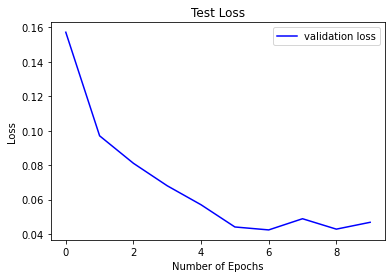

In [160]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 0s 2ms/step


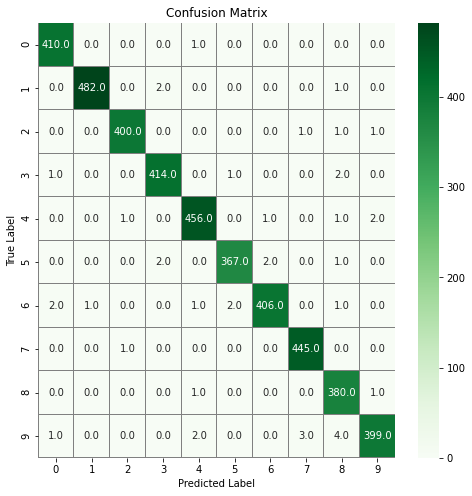

In [167]:
# confusion matrix
import seaborn as sns

#prediction values

Y_pred = model.predict(X_val)

#convert prediction to one hot encoded

Y_pred=np.argmax(Y_pred, axis=1)

Y_true = np.argmax(Y_val, axis=1)


confusion_mt=confusion_matrix(Y_true,Y_pred)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

132/132 [==============================] - 0s 2ms/step


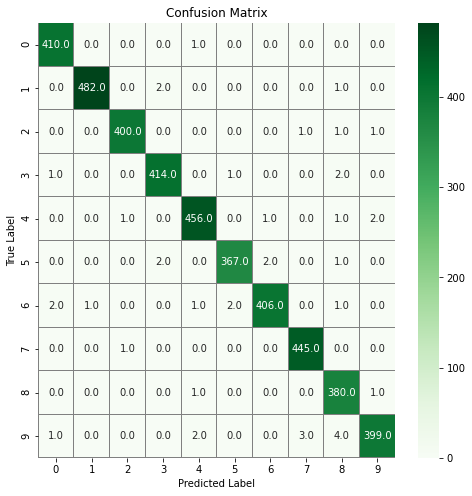

In [152]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [148]:
''''# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-148-d412e86efd08>, line 3)

In [126]:
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [127]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [128]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [129]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [130]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [131]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 13s 85ms/step - loss: 2.1703 - accuracy: 0.1960 - val_loss: 1.6608 - val_accuracy: 0.4476
Epoch 2/10
151/151 [==============================] - 9s 58ms/step - loss: 1.8622 - accuracy: 0.3432 - val_loss: 1.0706 - val_accuracy: 0.7162
Epoch 3/10
151/151 [==============================] - 9s 57ms/step - loss: 1.6935 - accuracy: 0.4059 - val_loss: 0.7997 - val_accuracy: 0.8029
Epoch 4/10
151/151 [==============================] - 8s 55ms/step - loss: 1.5891 - accuracy: 0.4487 - val_loss: 0.6522 - val_accuracy: 0.8262
Epoch 5/10
151/151 [==============================] - 9s 57ms/step - loss: 1.5189 - accuracy: 0.4760 - val_loss: 0.5374 - val_accuracy: 0.8650
Epoch 6/10
151/151 [==============================] - 9s 58ms/step - loss: 1.4743 - accuracy: 0.4914 - val_loss: 0.4842 - val_accuracy: 0.8740
Epoch 7/10
151/151 [==============================] - 9s 59ms/step - loss: 1.4222 - accuracy: 0.5131 - val_loss: 0.4135 - val_accuracy: 0.890